In [9]:
import data
import torch
from torch.utils.data import TensorDataset
import numpy as np
from scipy.stats import entropy, ks_2samp, moment, wasserstein_distance, energy_distance
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import gans.w_gan as wgan
import gans.w_gp_gan as wgpgan
import gans.vae as vae
import gans.ns_gan as nsgan
import gans.mm_gan as mmgan
import gans.ls_gan as lsgan
import gans.dra_gan as dragan
import gans.be_gan as began
from gans.load_data import get_data
from gans.utils import to_var, get_pdf, get_the_data, preprocess, get_metrics

In [2]:
size=50
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']

In [38]:
x = {}
for d in distributions:
    print(d)
    d1 = []
    d2 = []
    d3 = []
    d4 = []
    gen = data.Distribution(d,100)
    x[d] = {}
    for i in range(0,10):
        print(i)
        train_iter, val_iter, test_iter = preprocess(gen, 10000)
        train_iter_big, val_iter_big, test_iter_big = preprocess(gen, 100000)
        a = np.array(train_iter.dataset.data_tensor)
        b = np.array(train_iter_big.dataset.data_tensor)
        kl, jshannon, wd, ed = get_metrics(a,b)
        d1.append(kl)
        d2.append(jshannon)
        d3.append(wd)
        d4.append(ed)
    x[d]["kl"] = d1
    x[d]["js"] = d2
    x[d]["wd"] = d3
    x[d]["ed"] = d4

normal
0
1
2
3
4
5
6
7
8
9
beta
0
1
2
3
4
5
6
7
8
9
exponential
0
1
2
3
4
5
6
7
8
9
gamma
0
1
2
3
4
5
6
7
8
9
gumbel
0
1
2
3
4
5
6
7
8
9
laplace
0
1
2
3
4
5
6
7
8
9


In [26]:
for index, i in enumerate(x.keys()):
    print(index)
    if index==0:
        df = pd.DataFrame(x[i])
        df["distribution"]=distributions[0]
    else:
        temp = pd.DataFrame(x[i])
        temp['distribution']=distributions[index]
        df = df.append(temp)

0
1
2
3
4
5


In [39]:
df

,ed,js,kl,wd,distribution
0,4.467929,0.017286,0.085795,1.851781,normal
1,4.323218,0.019078,0.093108,1.758937,normal
2,4.446419,0.018682,0.092547,1.838098,normal
3,4.079545,0.019685,0.096021,1.663460,normal
4,4.829492,0.015208,0.076102,1.970287,normal
5,4.347297,0.018699,0.092832,1.756436,normal
6,4.484617,0.018237,0.092604,1.816675,normal
7,4.768790,0.016348,0.081020,1.976489,normal
8,4.139295,0.019165,0.091559,1.727335,normal
9,3.954869,0.017811,0.088104,1.654642,normal


In [36]:
df.groupby('distribution').mean()
# df.groupby('distribution').std()

,ed,js,kl,wd
distribution,,,,
beta,5.894529,0.030265,0.146017,5.437258
exponential,5.894529,0.030265,0.146017,5.437258
gamma,5.894529,0.030265,0.146017,5.437258
gumbel,5.894529,0.030265,0.146017,5.437258
laplace,5.894529,0.030265,0.146017,5.437258
normal,5.894529,0.030265,0.146017,5.437258


In [37]:
df

,ed,js,kl,wd,distribution
0,4.467929,0.017286,0.085795,1.851781,normal
1,4.323218,0.019078,0.093108,1.758937,normal
2,4.446419,0.018682,0.092547,1.838098,normal
3,4.079545,0.019685,0.096021,1.663460,normal
4,4.829492,0.015208,0.076102,1.970287,normal
5,4.347297,0.018699,0.092832,1.756436,normal
6,4.484617,0.018237,0.092604,1.816675,normal
7,4.768790,0.016348,0.081020,1.976489,normal
8,4.139295,0.019165,0.091559,1.727335,normal
9,3.954869,0.017811,0.088104,1.654642,normal


In [13]:
import numpy as np


In [15]:
for i in [d1,d2,d3,d4]:
    print(np.mean(i))
    print(np.std(i))

0.08125478000172277
0.008849360748972386
0.016783259528083835
0.0018976512587419979
1.6619251087056273
0.10771099949525723
4.150305254971919
0.30405279083922954


(0.12202908967022623,
 0.023248173286915932,
 2.8048021407085675,
 6.965223340269057)

In [5]:
tensor = torch.randn(5)

In [16]:
from copy import deepcopy

array([-1.2551422 , -0.7417505 , -0.05915301,  0.16260308,  1.2500254 ],
      dtype=float32)

In [8]:
from torch.autograd import Variable

In [33]:
gans[-1]

<module 'gans.vae' from '/Users/heart/github/gans6883/gans/vae.py'>

In [36]:
# TODO: loop over mixture models and circles
gans = [wgan, wgpgan, nsgan, lsgan, mmgan, dragan, began, vae]
gans_index = ["wgan", "wgpgan", "nsgan", "lsgan", "mmgan", "dragan", "began", "vae"]
res = {}
for index, gan in enumerate(gans[-1:]):
    res[gans_index[index]] = {}
    print(gans_index[index])
    for dist in distributions:
        res[gans_index[index]][dist]={}
        gen = data.Distribution(dist,size)
        train_iter, val_iter, test_iter = preprocess(gen, 10000)
        epochs = 5
        if gans_index[index]!="vae":
            model = vae.VAE(image_size = size, hidden_dim = 400, z_dim = 20)
            if torch.cuda.is_available():
                model.cuda()
            trainer = vae.Trainer(train_iter, val_iter, test_iter)
            model, kl, ks, js, wd, ed = trainer.train(model, num_epochs = epochs)
        else:
            model = gan.GAN(image_size = size, hidden_dim = 256, z_dim = int(round(size/4,0)))
            if torch.cuda.is_available():
                model = model.cuda()
            trainer = gan.Trainer(train_iter, val_iter, test_iter)
            model, kl, ks, js, wd, ed = trainer.train(model = model, num_epochs = epochs)
        res[gans_index[index]][dist]["KL-Divergence"] = kl
#         res[gans_index[index]][dist]["KS-Stat"] = ks
        res[gans_index[index]][dist]["Jensen-Shannon"] = js
        res[gans_index[index]][dist]["Wasserstein-Distance"] = wd
        res[gans_index[index]][dist]["Energy-Distance"] = ed

wgan


A Jupyter Widget

RuntimeError: size mismatch, m1: [100 x 200], m2: [50 x 400] at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/generic/THTensorMath.c:1434

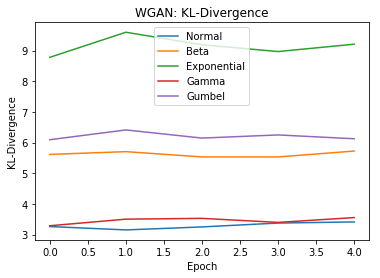

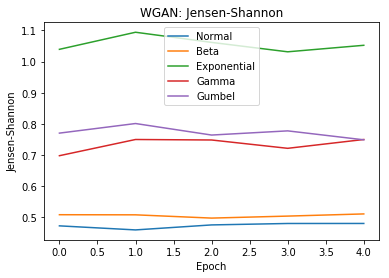

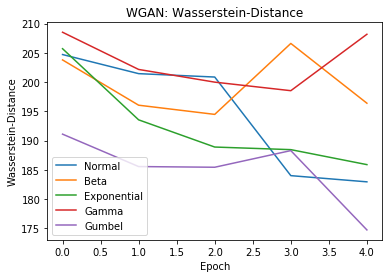

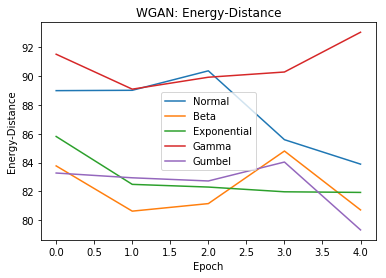

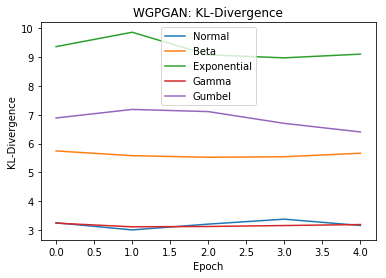

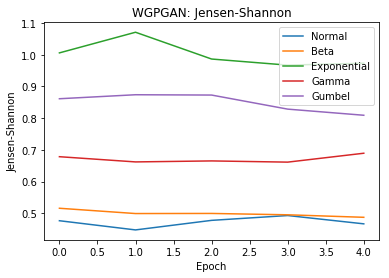

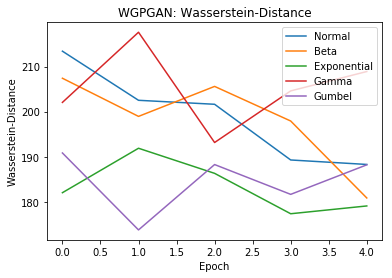

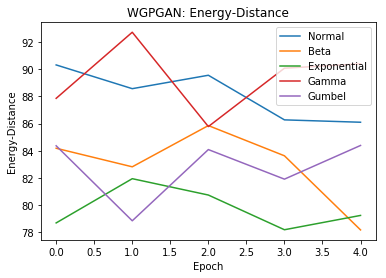

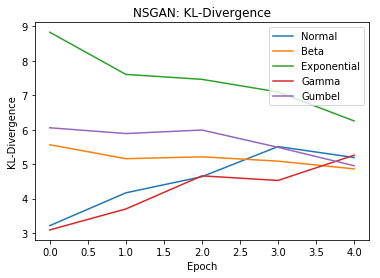

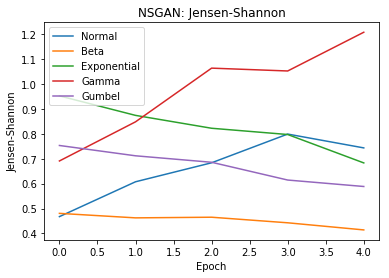

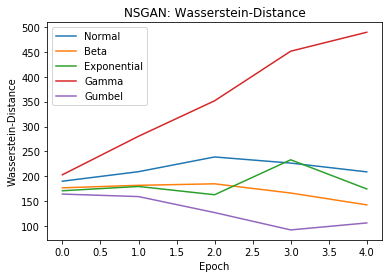

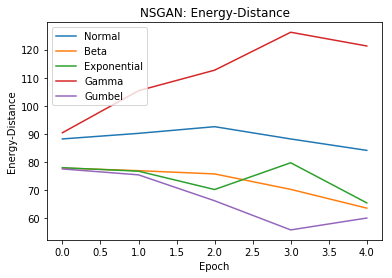

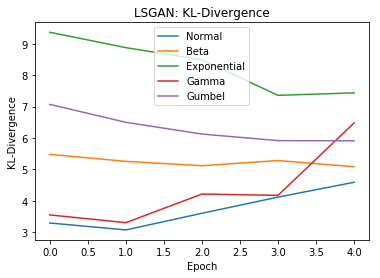

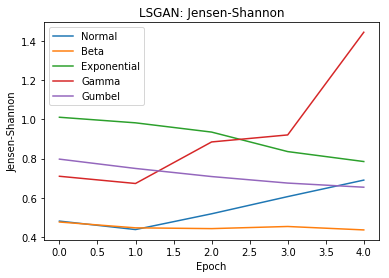

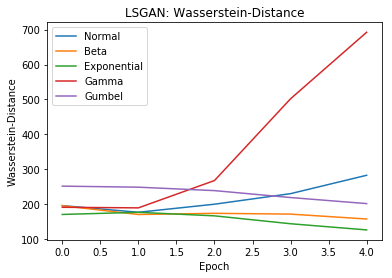

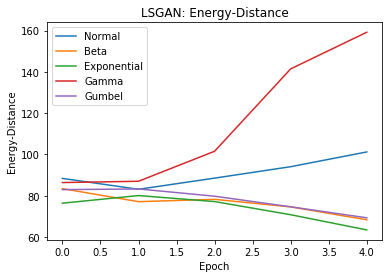

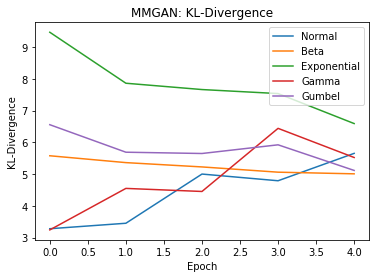

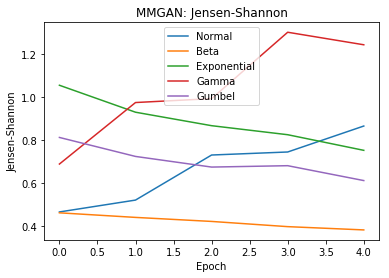

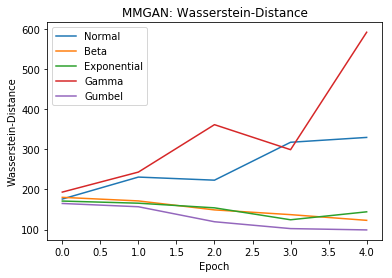

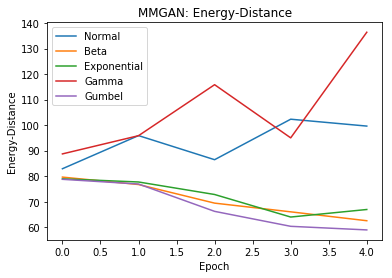

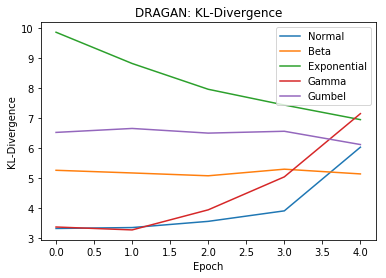

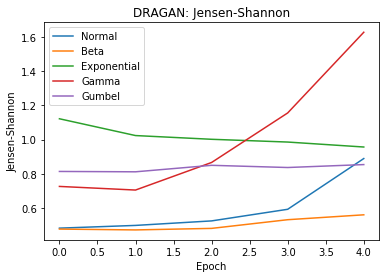

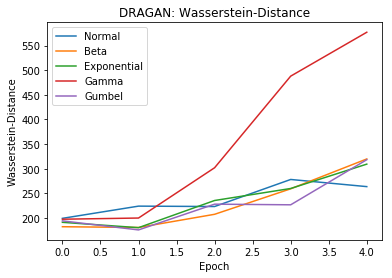

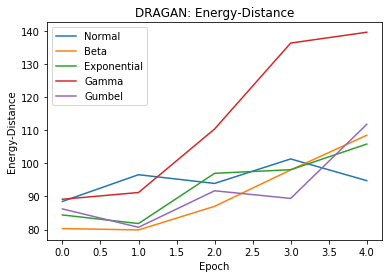

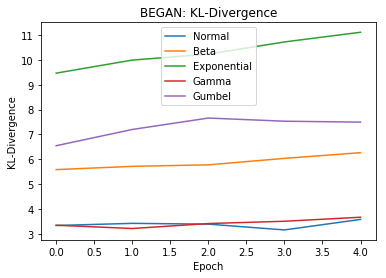

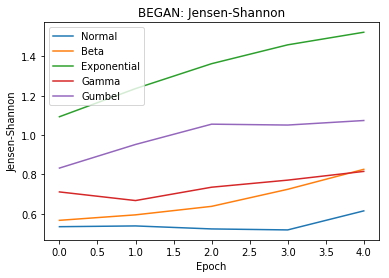

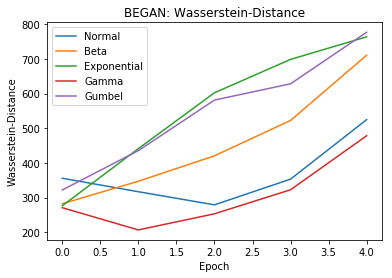

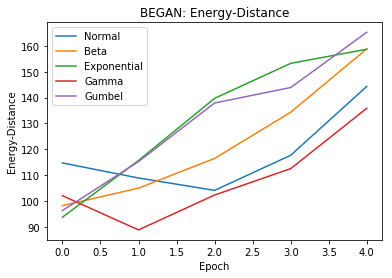

In [13]:
for gan in gans_index[:-1]:
    normal = pd.DataFrame(res[gan]['normal'])
    beta = pd.DataFrame(res[gan]['beta'])
    exponential = pd.DataFrame(res[gan]['exponential'])
    gamma = pd.DataFrame(res[gan]['gamma'])
    gumbel = pd.DataFrame(res[gan]['gumbel'])

    distance_metrics = ["KL-Divergence","Jensen-Shannon","Wasserstein-Distance","Energy-Distance"]
    for dist in distance_metrics:
        plt.plot(range(epochs),normal[dist], label="Normal")
        plt.plot(range(epochs),beta[dist], label="Beta")
        plt.plot(range(epochs),exponential[dist], label="Exponential")
        plt.plot(range(epochs),gamma[dist], label="Gamma")
        plt.plot(range(epochs),gumbel[dist], label="Gumbel")
        plt.xlabel("Epoch")
        plt.ylabel(dist)
        plt.title("{0}: {1}".format(gan.upper(), dist))
        plt.legend()
        plt.savefig('graphs/{0}_{1}.png'.format(gan, dist), dpi=100)
        plt.show()


# Multivariate Distributions Example

In [ ]:
# generator = data.Distribution(distributions[i], 200)
# generator.save_dist('output_file.pickle')  # Saving the generator

# Mixture Models Example

In [45]:
i=0
j=0
generator = data.MixtureDistribution(distributions[i], distributions[j], n_mixtures=15, dim=200)
# generator.get_log_likelihood(data_train)
# generator.save_dist()

In [46]:
train_iter, val_iter, test_iter = preprocess(generator, 500)

# Circles Example

In [47]:
generator = data.CirclesDatasetGenerator(size=256, n_circles=4, random_colors=True, random_sizes=True, modes=20)
x = generator.generate_samples(10000)
# print(len(x))
# print(x[0].shape)
# generator.generate_samples_to_directory(5000, './dataset_1')
# generator.save_generator('./generator1.pickle')

# MNIST Data

In [ ]:
# train_iter, val_iter, test_iter = get_data()

In [ ]:
# train_iter.dataset.data_tensor.shape

# Preprocessing Synthetic Data

In [ ]:
# gen = data.Distribution(distributions[i], size) 

In [ ]:
# train_iter, val_iter, test_iter = preprocess(generator, 10000)

In [ ]:
# train_iter.dataset.data_tensor.shape

# Controlled Experiments on GANs

## 1. Divergence Measures between Distributions

#### Measuring divergence between Synthetic Data and GAN Data with the following metrics: KL Divergences, Jensen-Shannon Divergence, Optimal Tranport Distance, Wasserstein Distance, Energy Distance, Total Variation Distance


# KS Stat, KL Divergence, JS Divergence

In [ ]:
size=50
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']

In [5]:
dist = distributions[0]
print(dist)
gen = data.Distribution(dist,size)
train_iter, val_iter, test_iter = preprocess(gen, 10000)

normal


In [10]:
torch.max(train_iter.dataset.data_tensor) - torch.min(train_iter.dataset.data_tensor)

22.663296699523926

In [12]:
a = np.array(train_iter.dataset.data_tensor)
a.shape

(10000, 50)

1.4621476829051971

In [27]:
def get_multi_pdf(data):
    x = []
    for i in range(data.shape[1]):
        x.append(list(np.histogram(data[:, i], bins=100, density=True)[0]))
    return np.array(x).T

In [28]:
a = np.array(train_iter.dataset.data_tensor)
b = np.array(test_iter.dataset.data_tensor)
x = get_multi_pdf(a)
y = get_multi_pdf(b)
x[x == 0] = .00001
y[y == 0] = .00001

In [29]:
x.shape[0]

100

In [30]:
x.shape

(100, 200)

In [31]:
y.shape

(100, 200)

In [25]:
x[:,0].shape

(100,)

In [ ]:
x.shape

In [ ]:
print("READY")

In [ ]:
wd = 0
for i in range(x.shape[1]):
    wd += energy_distance(x[:,i],y[:,i])
print(wd/x.shape[1])

In [ ]:
stuff = []
for i in tqdm_notebook(range(0, 10)):
    a = np.array(train_iter.dataset.data_tensor)
    b = np.array(test_iter.dataset.data_tensor)
    x = get_multi_pdf(a)
    y = get_multi_pdf(b)
    x[x == 0] = .00001
    y[y == 0] = .00001
    stuff.append(entropy(pk=x,qk=y))

In [ ]:
kl = np.array(stuff)

In [ ]:
kl.shape

In [ ]:
kl[0].sum()/len(kl[0])

In [ ]:
yo =np.mean(kl, axis=0)

In [ ]:
plt.bar(range(0,len(yo)), yo)
plt.show()

In [ ]:
plt.bar(range(0,len(yo)), yo)
plt.show()

In [ ]:
!pip install tqdm
from tqdm import tqdm_notebook, tqdm

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
kl.shape

In [ ]:
plt.bar(range(0,len(kl)), kl)
plt.show()

In [ ]:
kl

In [ ]:
for gan in gans_index[:-1]:
    normal = pd.DataFrame(res[gan]['normal'])
    beta = pd.DataFrame(res[gan]['beta'])
    exponential = pd.DataFrame(res[gan]['exponential'])
    gamma = pd.DataFrame(res[gan]['gamma'])
    gumbel = pd.DataFrame(res[gan]['gumbel'])

    distance_metrics = ["KL-Divergence","Jensen-Shannon","Wasserstein-Distance","Energy-Distance"]
    for dist in distance_metrics:
        plt.plot(range(epochs),normal[dist], label="Normal")
        plt.plot(range(epochs),beta[dist], label="Beta")
        plt.plot(range(epochs),exponential[dist], label="Exponential")
        plt.plot(range(epochs),gamma[dist], label="Gamma")
        plt.plot(range(epochs),gumbel[dist], label="Gumbel")
        plt.xlabel("Epoch")
        plt.ylabel(dist)
        plt.title("{0}: {1}".format(gan.upper(), dist))
        plt.legend()
        plt.show()


## 2. Empirical Analysis of Mode Collapse

#### Three methods to measure mode collapse Inception Score, MODE Score, Frechet Inception Distance

In [ ]:
# Here's where I'm not yet sure how to approach the problem. 

## 3. Empirical Evaluation of Performance with varying Information Geometry

In [ ]:
# Here we look over different degrees of complexity which we can define before. 

## 4. Evaluation of Empirical Sample Complexity

In [ ]:
# Here we're looking at number of samples. So, we just loop through samples!

## Here's all the GANs by themselves

# WGAN

In [ ]:
model = wgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)

# WGAN GP

In [ ]:
model = wgpgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128) 
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgpgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 5)

# VAE

In [ ]:
model = vae.VAE(image_size = size, hidden_dim = 400, z_dim = 20)
if torch.cuda.is_available():
    model.cuda()
trainer = vae.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model, num_epochs = n)

# # Explore latent space
# viz = vae.Viz(train_iter, val_iter, test_iter, model)
# viz.make_all()

# NS GAN

In [ ]:
model = nsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = nsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, D_steps = 1)

# MM GAN

In [ ]:
model = mmgan.GAN(image_size = size, hidden_dim = 400, z_dim = 100)
if torch.cuda.is_available():
    model = model.cuda()
trainer = mmgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, G_init = 5, D_steps = 1)

# LS GAN

In [ ]:
model = lsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = lsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# DRA GAN

In [ ]:
model = dragan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = dragan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# BE GAN

In [ ]:
model = began.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = began.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)